In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("concrete_data.csv")

In [34]:
df.head(3)

,cement_component,furnace_slag,flay_ash,water_component,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [35]:
X = df.drop(['concrete_strength'],axis=1).values

y = df['concrete_strength'].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [36]:
m = len(y) # number of examples : 8
learningrate = 0.1

ones = np.ones((m,1)) 
X = np.hstack((ones, X)) # shape : (8,2)
y = y[:,np.newaxis] # shape : (8.1)

theta = np.zeros(( X.shape[1],1)) # shape : (2,1)

print(theta)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [37]:
momentum = 0.2
vw = 0.0
vb = 0.0
lr = 0.1

loss_history_mom = []
w_history_mom = []
b_history_mom = []
iteration_mom = []

max_epochs = 100

for epoch in range(max_epochs):
    iteration_mom.append(epoch)
    y_pred = np.dot(X,theta)

    loss =  0.5 * np.mean((y_pred - y)**2)
    loss_history_mom.append(loss)

    db = np.mean(y_pred - y)
    dw = np.mean((y_pred -  X) * X)
    
    vb = momentum * vb - lr * db
    theta[0] = theta[0] + vb

    # weights_update Momentum
    vw = momentum * vw - lr * dw
    theta[1] = theta[1] + vw

Text(0, 0.5, 'loss')

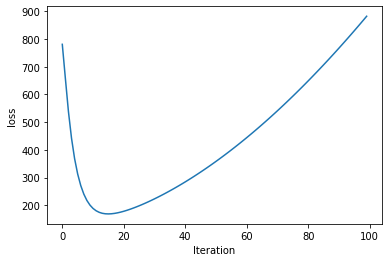

In [38]:
import matplotlib.pyplot as plt
plt.plot(iteration_mom,loss_history_mom)
plt.xlabel("Iteration")
plt.ylabel("loss")